In [11]:
import pyabf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib notebook

In [3]:
filepath = '/Volumes/brain_slice/Tsai/03-08-19_VIP-cre_Cheata-tdTom_P38/t030719a_VIPpos1_0000.abf'
abf = pyabf.ABF(filepath)

In [17]:
abf.sweepList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [24]:
y = []
opto = []
for sweep in abf.sweepList:
    abf.setSweep(sweep,channel=0)
    y.append(abf.sweepY)
    abf.setSweep(sweep,channel=1)
    opto.append(abf.sweepY)
y = np.stack(y)
opto = np.stack(opto)
x = abf.sweepX

<IPython.core.display.Javascript object>


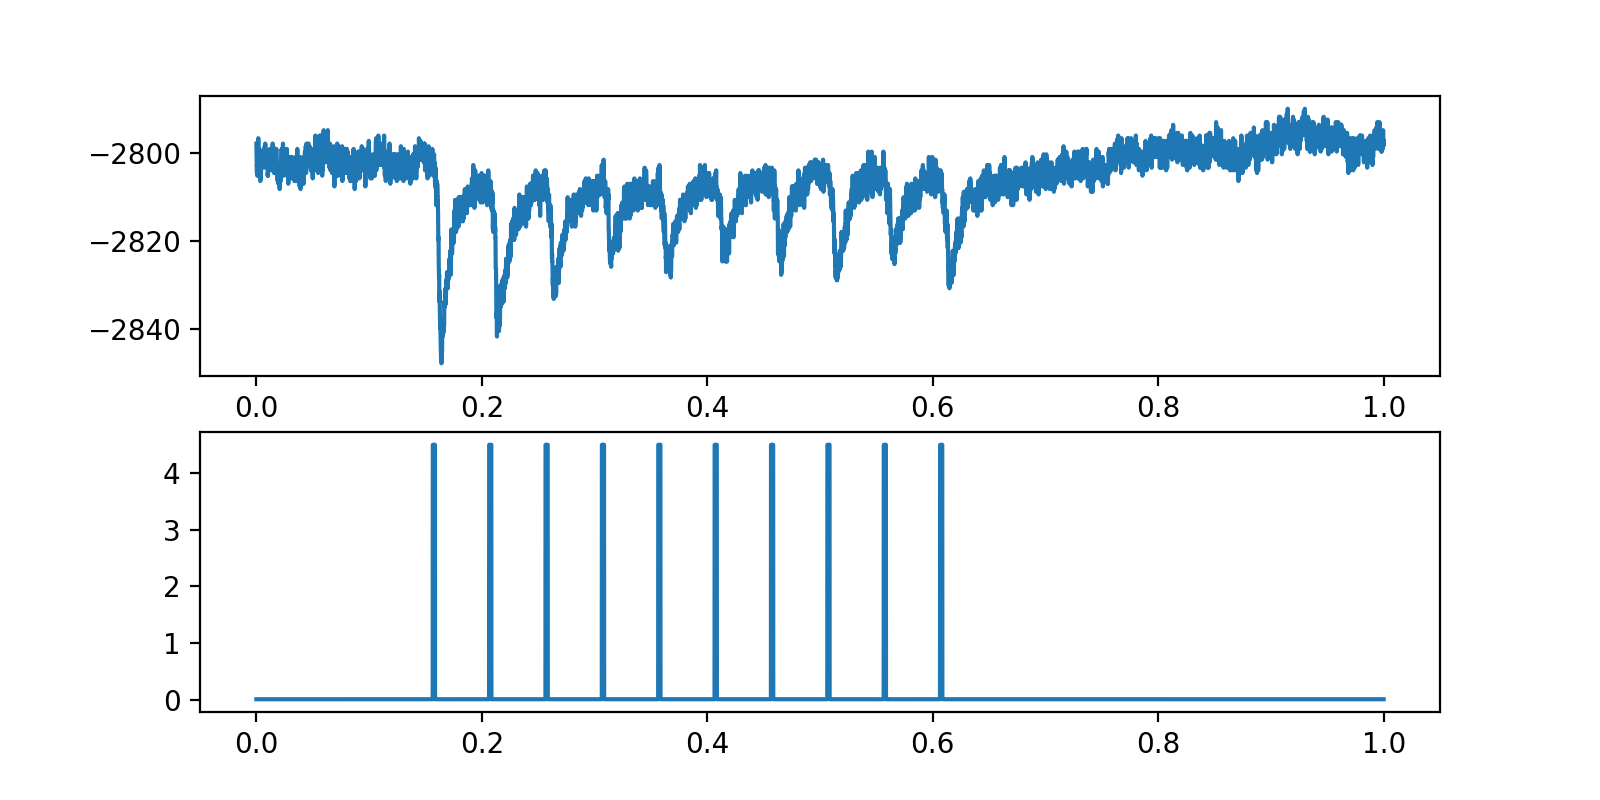

In [28]:
f, ax = plt.subplots(2,1,figsize = (8,4))
ax[0].plot(x,y[0,:])
ax[1].plot(x,opto[0,:])

<IPython.core.display.Javascript object>


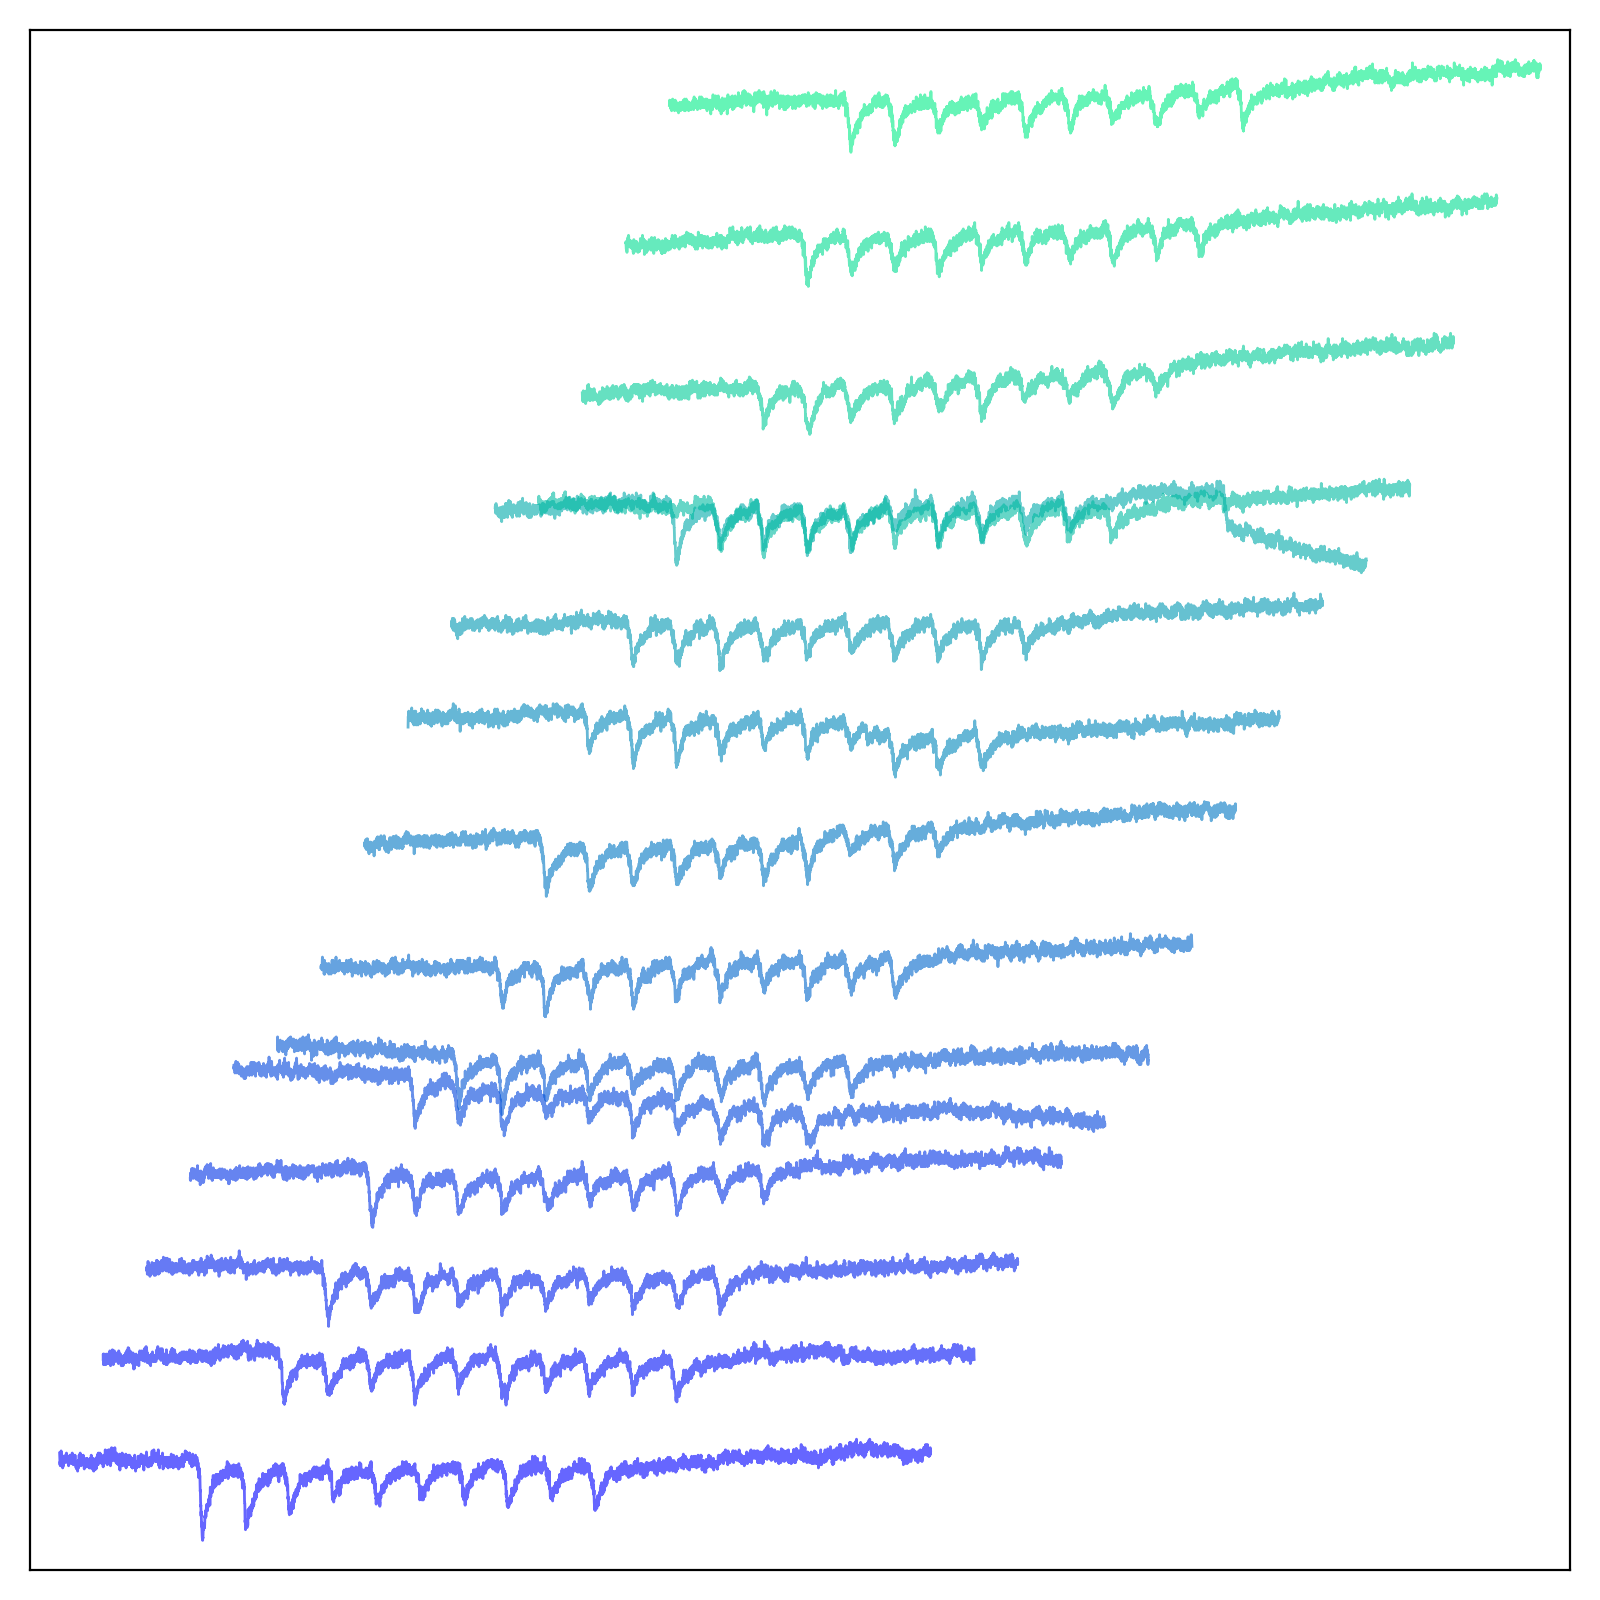

In [30]:

# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(8,8))
for sweepNumber in abf.sweepList:
    plt.plot(
        x + .05 * sweepNumber,
        y[sweepNumber,:] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


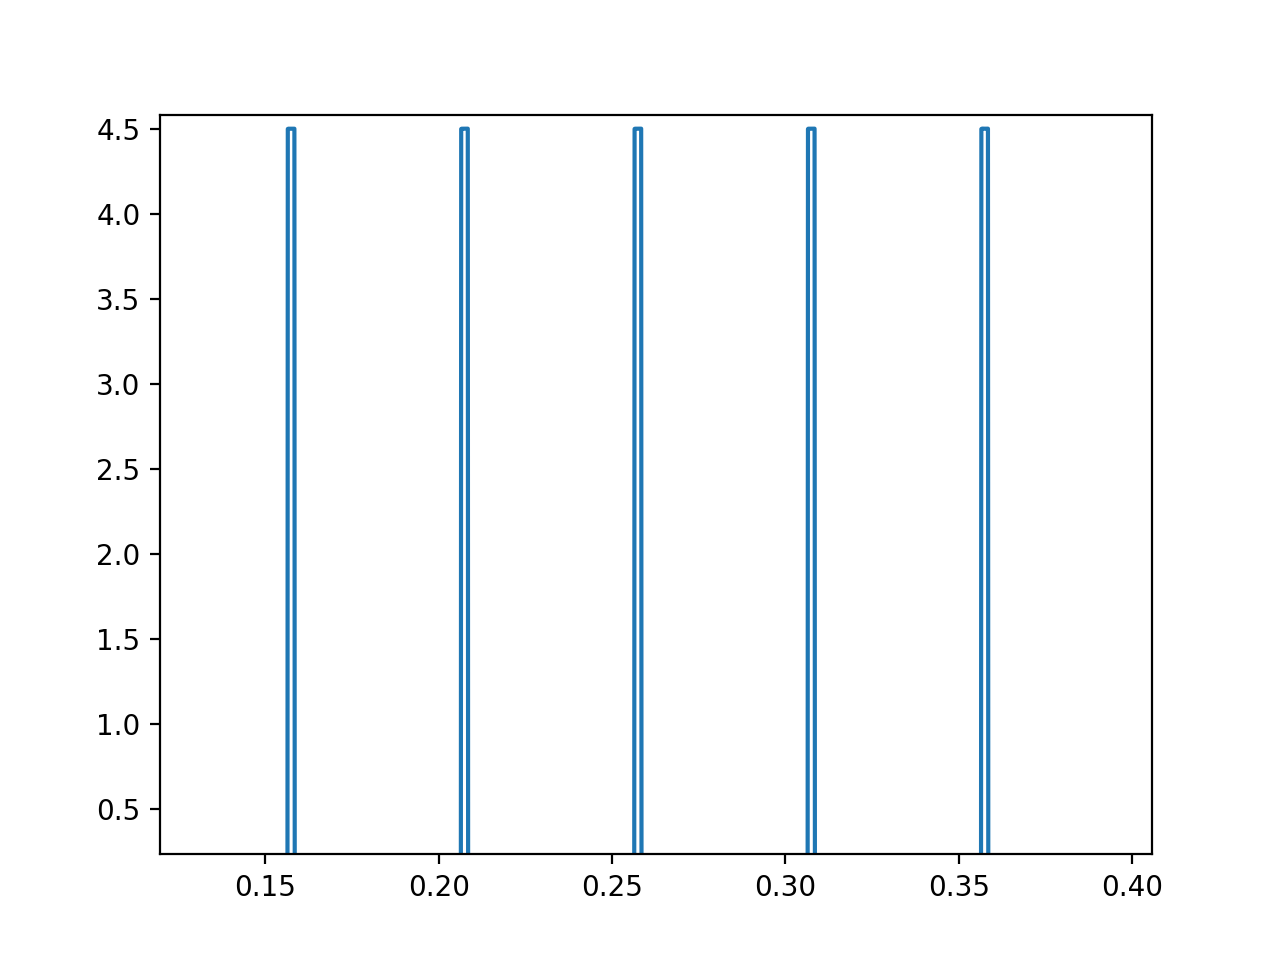

In [15]:
abf.setSweep(0,channel=1)
# plt.plot(abf.sweepX,abf.sweepY)
plt.plot(abf.sweepX,abf.sweepY)

In [5]:
abf.dataLengthSec

76.0

In [1]:
# abf.sweepBaseline(0,0.09)

# # only plot data between this time range
i1 = int(abf.dataRate*0)
i2 = int(abf.dataRate*2)


# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(12, 10))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber,channel = 0)
    plt.plot(
        abf.sweepX[i1:i2] + .05 * sweepNumber,
        abf.sweepY[i1:i2] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

NameError: name 'abf' is not defined

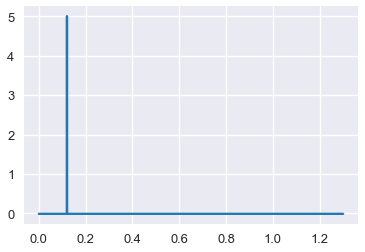

In [80]:
abf.setSweep(0,channel=2)
plt.plot(abf.sweepX,abf.sweepC)

In [94]:
?pyabf.filter.gaussian(abf,0)

Text(0.5,159,'time (seconds)')

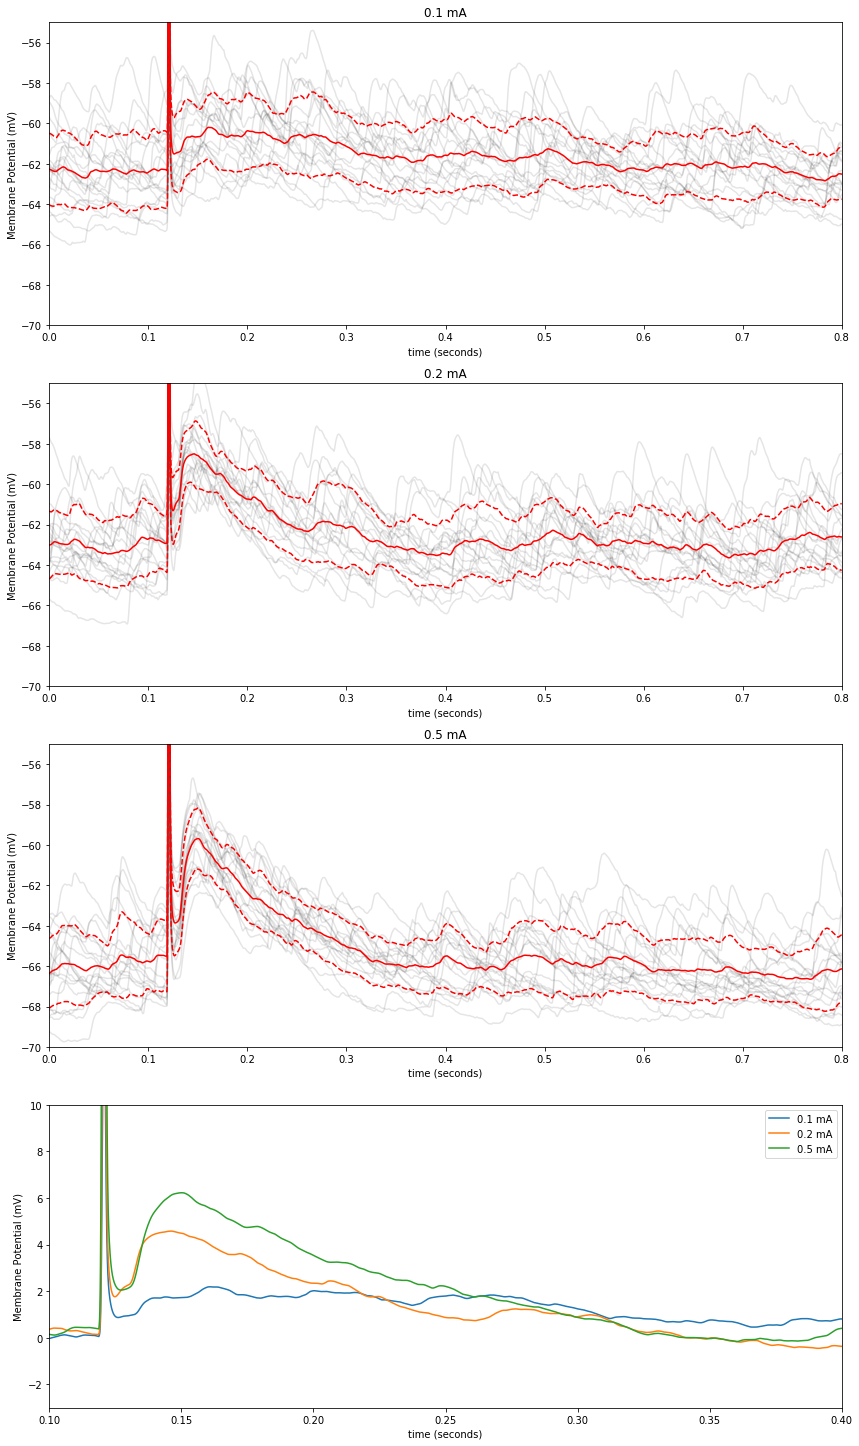

In [4]:
f, all_ax = plt.subplots(4,1,figsize = (12,20))
for j,filenum in enumerate([4,5,6]):
    abf = pyabf.ABF("/Volumes/brain_slice/Naka/Data/confocal_ephys/2018_11_14/2018_11_14_000{}.abf".format(filenum))    
    ax=all_ax[j]
    sweeps = []
    pyabf.filter.gaussian(abf,0.5)
    for i in abf.sweepList[1:]:
        abf.setSweep(i)
        ax.plot(abf.sweepX,abf.sweepY, alpha = 0.1, color = 'k')
        sweeps.append(abf.sweepY)
    
#     print(np.max(abf.sweepC))
    meansweep = np.array(sweeps).mean(axis = 0)
    ax.plot(abf.sweepX,meansweep,color = 'r')
    ax.plot(abf.sweepX,meansweep + np.array(sweeps).std(axis = 0),color = 'r', linestyle ='--')
    ax.plot(abf.sweepX,meansweep - np.array(sweeps).std(axis = 0),color = 'r', linestyle ='--')
    ax.set_xlim((0,0.8))
    ax.set_ylim((-70,-55))
    ax.set_ylabel(abf.sweepLabelY)
    ax.set_xlabel(abf.sweepLabelX)
    abf.setSweep(0,channel=2)
    stim_intensity = np.max(abf.sweepC)
    ax.set_title('{} mA'.format(stim_intensity/10))
    all_ax[3].plot(abf.sweepX,meansweep -np.mean(meansweep[:5000]))
abf.setSweep(0,channel=0)
all_ax[2].set_xlabel(abf.sweepLabelX)
plt.tight_layout()
all_ax[3].set_ylim((-3,10))
all_ax[3].set_xlim((0.1,0.4))
all_ax[3].legend(['0.1 mA','0.2 mA','0.5 mA'])
all_ax[3].set_ylabel(abf.sweepLabelY)
all_ax[3].set_xlabel(abf.sweepLabelX)

In [ ]:
f, all_ax = plt.subplots(3,1,figsize = (12,20), sharex = True, sharey = True)
for j,filenum in enumerate([4,5,6]):
    abf = pyabf.ABF("/Volumes/brain_slice/Naka/Data/confocal_ephys/2018_11_14/2018_11_14_000{}.abf".format(filenum))    
    ax=all_ax[j]
    sweeps = []
    pyabf.filter.gaussian(abf,1)
    for i in abf.sweepList[1:]:
        abf.setSweep(i)
        ax.plot(abf.sweepX,abf.sweepY, alpha = 0.1, color = 'k')
        sweeps.append(abf.sweepY)
#     abf.setSweep(0,channel=2)
#     print(np.max(abf.sweepC))
    ax.plot(abf.sweepX,np.array(sweeps).mean(axis = 0),color = 'r')
    ax.plot(abf.sweepX,np.array(sweeps).mean(axis = 0)+ np.array(sweeps).std(axis = 0),color = 'r', linestyle ='--')
    ax.plot(abf.sweepX,np.array(sweeps).mean(axis = 0)- np.array(sweeps).std(axis = 0),color = 'r', linestyle ='--')
    ax.set_xlim((0,0.8))
    ax.set_ylim((-70,-55))
    ax.set_ylabel(abf.sweepLabelY)
ax.set_xlabel(abf.sweepLabelX)
plt.tight_layout()

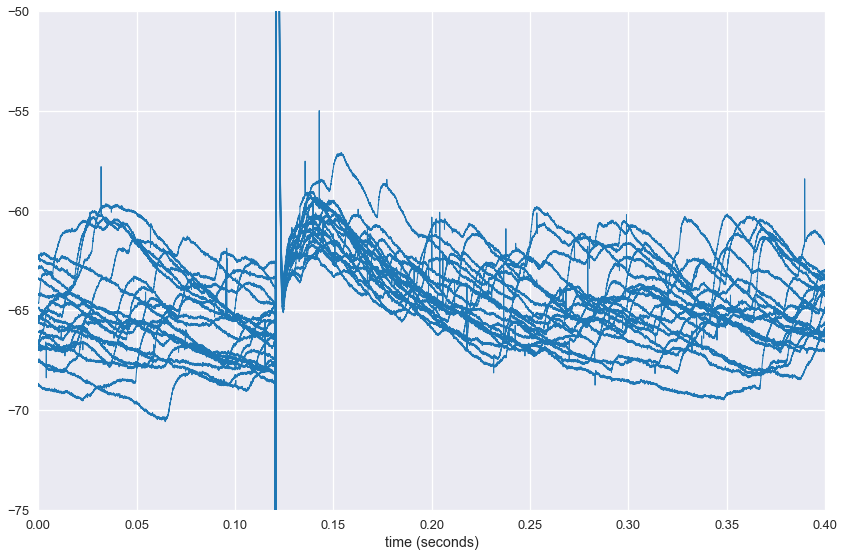

In [29]:
sns.set_context('talk')
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))

for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
#     plt.plot(abf.sweepX, abf.sweepY + 140*sweepNumber,
#              color='C0', lw=1)
#     plt.plot(abf.sweepX, abf.sweepY + 14*sweepNumber,
#              color='C0', lw=1)
    plt.plot(abf.sweepX, abf.sweepY,
             color='C0', lw=1)
# plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.xlabel(abf.sweepLabelX)
plt.ylim((-75,-50))
plt.xlim((0,0.4))
plt.margins(0, .02)
plt.tight_layout()

plt.show()

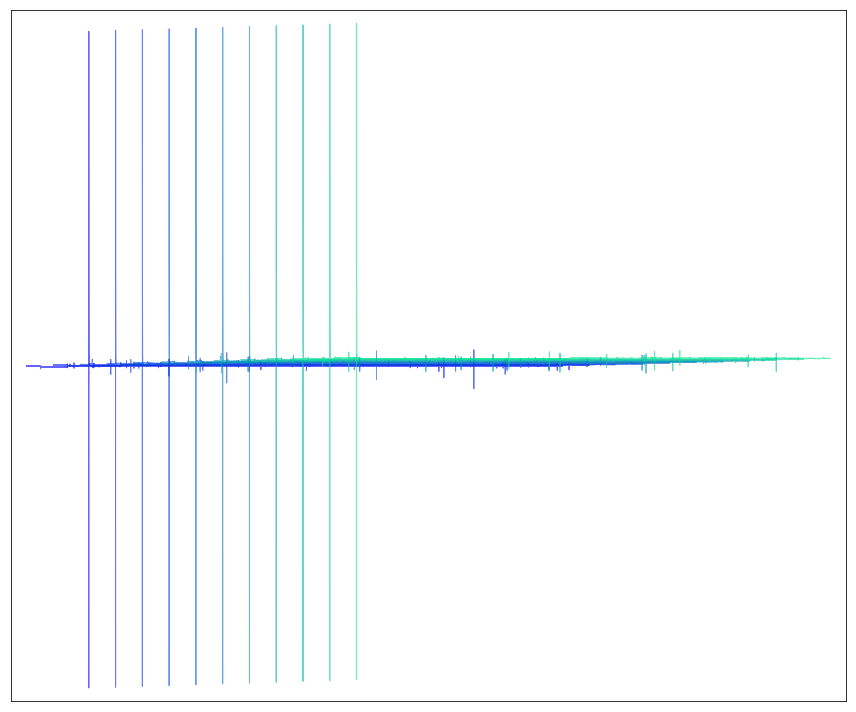

In [4]:
# abf.sweepBaseline(0,0.09)

# # only plot data between this time range
i1 = int(abf.dataRate*0)
i2 = int(abf.dataRate*2)


# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(12, 10))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber,channel = 0)
    plt.plot(
        abf.sweepX[i1:i2] + .05 * sweepNumber,
        abf.sweepY[i1:i2] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

Text(0,0.5,'Membrane Potential (mV)')

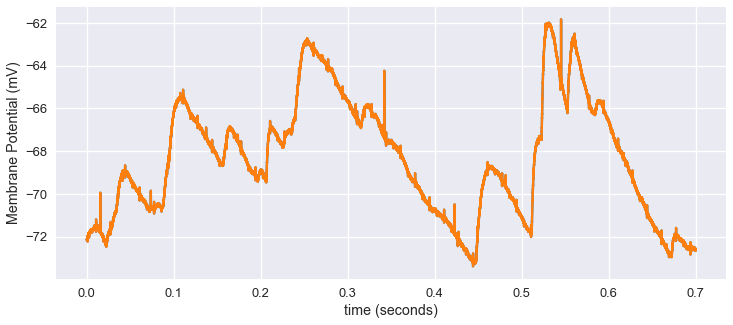

In [24]:
i = 15
f, ax = plt.subplots(figsize = (12,5))
abf.setSweep(i)
ax.plot(abf.sweepX,abf.sweepY)
pyabf.filter.gaussian(abf,0)
abf.setSweep(i)
ax.plot(abf.sweepX,abf.sweepY)
ax.set_xlabel(abf.sweepLabelX)
ax.set_ylabel(abf.sweepLabelY)

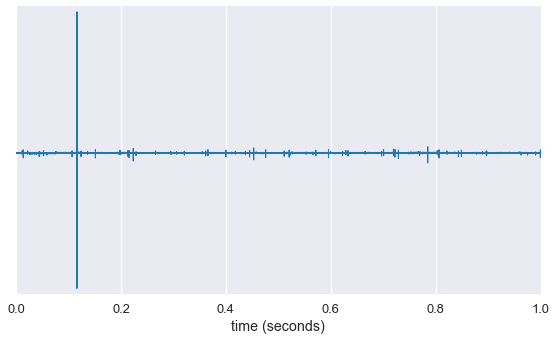

In [5]:
sns.set_context('talk')
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))

for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
#     plt.plot(abf.sweepX, abf.sweepY + 140*sweepNumber,
#              color='C0', lw=1)
    plt.plot(abf.sweepX, abf.sweepY + 14*sweepNumber,
             color='C0', lw=1)
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.xlabel(abf.sweepLabelX)
plt.margins(0, .02)
plt.tight_layout()

plt.show()

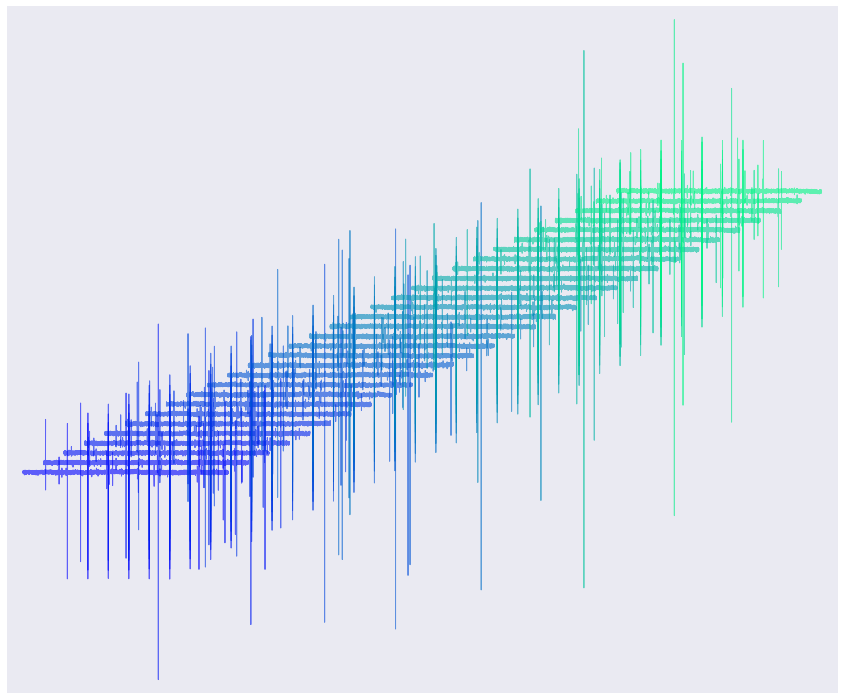

In [21]:
# abf.sweepBaseline(0,0.09)

# # only plot data between this time range
i1 = int(abf.dataRate*0)
i2 = int(abf.dataRate*2)


# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(12, 10))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber,channel = 0)
    plt.plot(
        abf.sweepX[i1:i2] + .05 * sweepNumber,
        abf.sweepY[i1:i2] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

In [49]:
abf = pyabf.ABF("/Volumes/brain_slice/Naka/Data/confocal_ephys/2018_11_02/2018_11_02_a/2018_11_02_0008.abf")

<IPython.core.display.Javascript object>


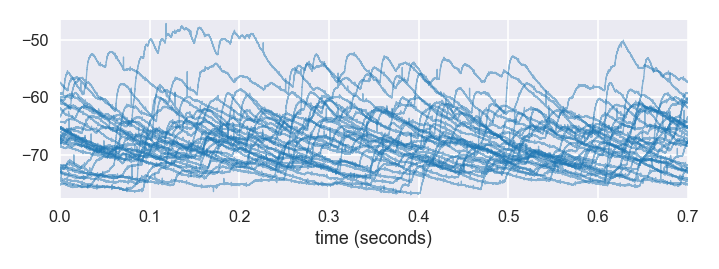

In [35]:
sns.set_context('talk')
sns.set_style('darkgrid')
f, ax = plt.subplots(1,1,figsize=(8, 3), sharey = True)

file = 0
for sweepNum in abf.sweepList:
    abf.setSweep(sweepNum)
    ax.plot(abf.sweepX, abf.sweepY,
             color='C0', lw=1, alpha = 0.5)

#     ax.set_xlim([0.1078,0.1084])
# ax.set_ylim([-600,600])
plt.xlabel(abf.sweepLabelX)
plt.margins(0, .02)
plt.tight_layout()

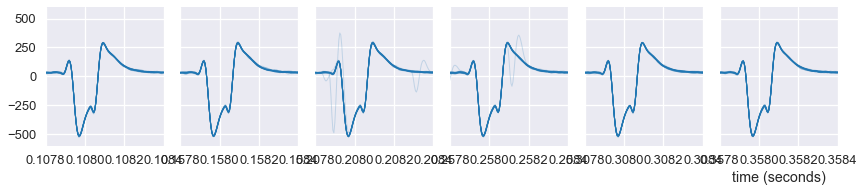

In [29]:
sns.set_context('talk')
sns.set_style('darkgrid')
f, ax = plt.subplots(1,6,figsize=(12, 3), sharey = True)

file = 0
for sweepNum in abf.sweepList:
    for stimNum in range(6):
        abf.setSweep(sweepNum)
        ax[stimNum].plot(abf.sweepX, abf.sweepY,
                 color='C0', lw=1, alpha = 0.2)

        ax[stimNum].set_xlim([0.1078+0.05*stimNum,0.1084+0.05*stimNum])
ax[0].set_ylim([-600,600])
plt.xlabel(abf.sweepLabelX)
plt.margins(0, .02)
plt.tight_layout()


<IPython.core.display.Javascript object>


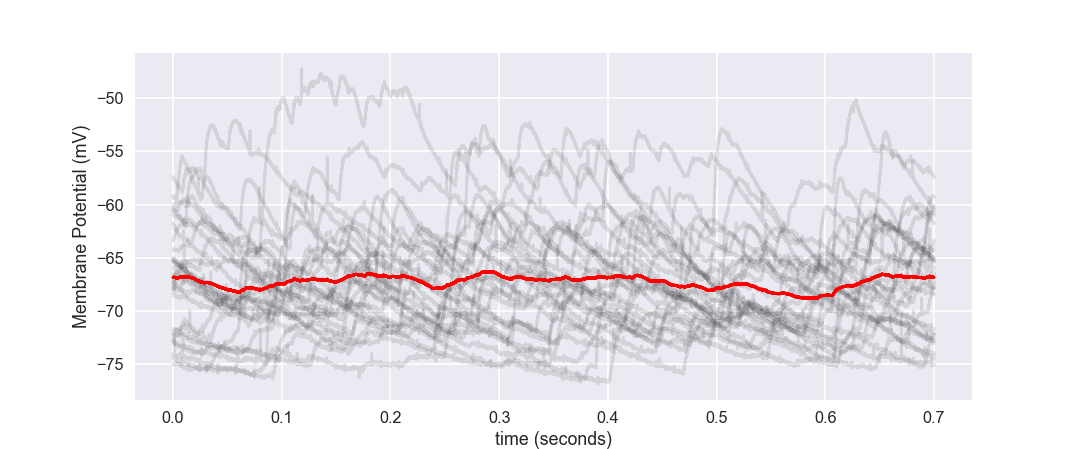

Text(0,0.5,'Membrane Potential (mV)')

In [36]:
f, ax = plt.subplots(figsize = (12,5))

sweeps = []
pyabf.filter.gaussian(abf,0)
for i in abf.sweepList[1:]:
    abf.setSweep(i)
    ax.plot(abf.sweepX,abf.sweepY, alpha = 0.1, color = 'k')
    sweeps.append(abf.sweepY)
    
ax.plot(abf.sweepX,np.array(sweeps).mean(axis = 0),color = 'r')
# ax.set_xlim((0.3,1))
ax.set_ylim(auto = True)
ax.set_xlabel(abf.sweepLabelX)
ax.set_ylabel(abf.sweepLabelY)

In [12]:
abf.sweepC.shape

(50000,)

ValueError: Channel 3 not available (must be 0 - 1)

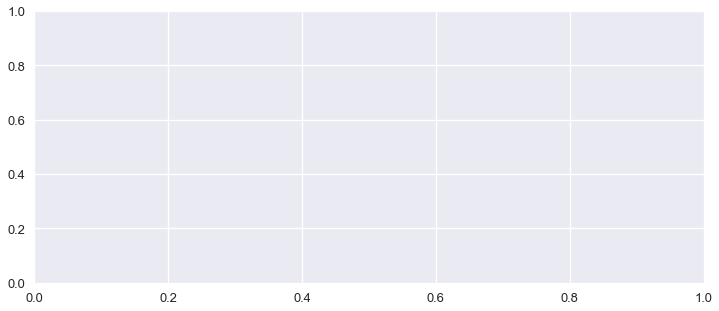

In [17]:
f, ax = plt.subplots(figsize = (12,5))
abf.setSweep(5,3)
ax.plot(abf.sweepX,abf.sweepC,color = 'r')
# ax.set_xlim((0.2,1))
# ax.set_ylim((-20,20))
ax.set_xlabel(abf.sweepLabelX)
ax.set_ylabel(abf.sweepLabelY)